## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [2]:
dataset = pd.read_clipboard("./datasets/titanic.csv")

dataset.head()

EmptyDataError: No columns to parse from file

In [22]:
dataset.shape

(5, 1)

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   import os  5 non-null      object
dtypes: object(1)
memory usage: 172.0+ bytes


In [24]:
dataset.describe()

,import os
count,5
unique,5
top,"file_path = ""your_file.csv"" # Змініть на реал..."
freq,1


***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [25]:
dataset.isnull().sum()

import os    0
dtype: int64

Ваші висновки:

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



In [26]:
numeric_dataset = dataset.select_dtypes(include=['number'])

correlation_matrix = numeric_dataset.corr(method='pearson')

plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Кореляційна матриця")
plt.show()


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1400x800 with 0 Axes>

Ваші висновки:

#todo

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [ ]:
def fill_missing_data(dataset, column, group_cols):
    dataset = dataset.copy()  
    dataset[column] = dataset[column].fillna(dataset.groupby(group_cols)[column].transform("median"))
    return dataset

df_filled = fill_missing_data(dataset, "Age", ["Pclass", "Sex"])

print(df_filled.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки:

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





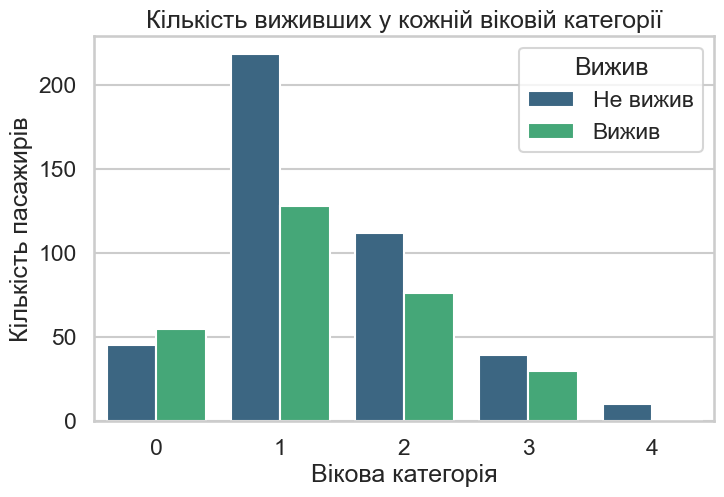

In [ ]:
bins = [0, 16, 32, 48, 64, 80]
labels = [0, 1, 2, 3, 4]
dataset["Age_bin"] = pd.cut(dataset["Age"], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 5))
sns.countplot(x="Age_bin", hue="Survived", data=dataset, palette="viridis")

plt.xlabel("Вікова категорія")
plt.ylabel("Кількість пасажирів")
plt.title("Кількість виживших у кожній віковій категорії")
plt.legend(title="Вижив", labels=["Не вижив", "Вижив"])

plt.show()


Ваші висновки:

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

In [ ]:
dataset["Fare_category"] = pd.qcut(dataset["Fare"], q=4, labels=[1, 2, 3, 4])

fare_survival_table = pd.crosstab(dataset["Fare_category"], dataset["Survived"], margins=True)


fare_survival_table["Survival Rate (%)"] = fare_survival_table[1] / fare_survival_table["All"] * 100
fare_survival_table = fare_survival_table.drop('All')

fare_survival_table

Survived,0,1,All,Survival Rate (%)
Fare_category,,,,
1,179,44,223,19.730942
2,156,68,224,30.357143
3,121,101,222,45.495495
4,93,129,222,58.108108


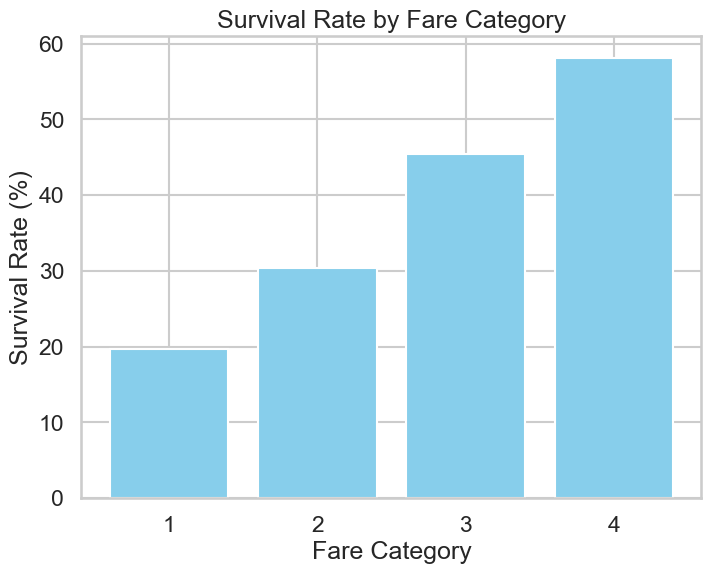

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(fare_survival_table.index.astype(int), fare_survival_table["Survival Rate (%)"], color='skyblue')

plt.xlabel('Fare Category')
plt.xticks(range(1, 5)) 
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Fare Category')

plt.show()

Ваші висновки:

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [ ]:
# Обчислюємо загальний розмір сім'ї (кількість родичів на борту)
dataset["Family_size"] = dataset["Parch"] + dataset["SibSp"]

dataset["Alone"] = (dataset["Family_size"] == 0).astype(int)

dataset["Family_size"].sum()

family_survival = dataset.groupby("Family_size")["Survived"].mean() * 100

plt.figure(figsize=(12, 8))
plt.bar(family_survival.index, family_survival, color='lightcoral')

plt.xlabel("Family Size")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Family Size")
plt.xticks(range(0, dataset["Family_size"].max() + 1))
plt.xlim(-0.5, dataset["Family_size"].max() + 0.5) 
plt.show()

# dataset["Family_size"].max()

NameError: name 'dataset' is not defined

Ваші висновки:

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [ ]:
#CODE

Ваші висновки:

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [ ]:
#CODE

Ваші висновки:

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



In [ ]:
#code

Ваші висновки:

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

In [ ]:
#code

Ваші висновки:

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

In [ ]:
#code

Ваші висновки:

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.